# Pandas

The `numpy` module is excellent for numerical computations, but to handle missing data or arrays with mixed types takes more work. The `pandas` module is currently the most widely used tool for data manipulation, providing high-performance, easy-to-use data structures and advanced data analysis tools.

In particular `pandas` features:

* A fast and efficient "DataFrame" object for data manipulation with integrated indexing;
* Tools for reading and writing data between in-memory data structures and different formats (CSV, Excel, SQL, HDF5);
* Intelligent data alignment and integrated handling of missing data;
* Intelligent label-based slicing, fancy indexing, and subsetting of large data sets;
* Aggregating or transforming data with a powerful "group-by" engine; 
* High performance merging and joining of data sets;
* Hierarchical axis indexing provides an intuitive way of working with high-dimensional data in a lower-dimensional data structure;
* Time series-functionalities;
* Highly optimized for performance, with critical code paths written in Cython or C.


In [38]:
import pandas as pd
import numpy as np

## Series

Series are completely equivalent to 1D array but with axis labels and the possibility to store heterogeneous elements. Of paramount importance are the time-series, used to define time evolutions of a phenomenon. 


In [39]:
from string import ascii_lowercase as letters

# Creating a series, accessing indexes, values and values by their index 
xs = pd.Series(np.arange(10)*0.5, index=tuple(letters[:10]))
print ("xs:", xs,'\n')
print ("xs indexes:",xs.index,'\n')
# Values of the Series are actually a numpy array
print ("xs values:", xs.values, type(xs.values),'\n')
print (xs['f'], xs.f, xs.h, '\n')
print (xs[['d', 'f', 'h']], '\n')
print (type(xs[['d', 'f', 'h']]), '\n')

xs: a    0.0
b    0.5
c    1.0
d    1.5
e    2.0
f    2.5
g    3.0
h    3.5
i    4.0
j    4.5
dtype: float64 

xs indexes: Index(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j'], dtype='object') 

xs values: [0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5] <class 'numpy.ndarray'> 

2.5 2.5 3.5 

d    1.5
f    2.5
h    3.5
dtype: float64 

<class 'pandas.core.series.Series'> 



In [40]:
# Extracting elements and operations: same as numpy array
print (xs[:3],'\n')
print (xs[7:], '\n')
print (xs[::3], '\n')
print (xs[xs>3], '\n')
print (np.exp(xs), '\n')
print (np.mean(xs), np.std(xs), '\n')

a    0.0
b    0.5
c    1.0
dtype: float64 

h    3.5
i    4.0
j    4.5
dtype: float64 

a    0.0
d    1.5
g    3.0
j    4.5
dtype: float64 

h    3.5
i    4.0
j    4.5
dtype: float64 

a     1.000000
b     1.648721
c     2.718282
d     4.481689
e     7.389056
f    12.182494
g    20.085537
h    33.115452
i    54.598150
j    90.017131
dtype: float64 

2.25 1.4361406616345072 



In [41]:
# Series can be created from python dictionary too.
# Not that the elements can be whatever!
d = {'b' : 1, 'a' : 'cat', 'c' : [2,3]}
pd.Series(d)



b         1
a       cat
c    [2, 3]
dtype: object

A key difference between Series and ndarray is that operations between Series automatically align the data based on label. Thus, you can write computations without considering whether the Series involved have the same labels.

In [42]:
s = pd.Series(np.random.randn(5), index=tuple(letters[:5]))
print(s)
s = s[1:] + s[:-1]
print(s)

a   -1.540836
b    1.110984
c   -0.112820
d    1.272426
e   -1.003654
dtype: float64
a         NaN
b    2.221969
c   -0.225640
d    2.544853
e         NaN
dtype: float64


### Time series

Time series are very often used to profile the behaviour of a quantity as a function of time. Pandas as a special index for that, `DatetimeIndex`, that can be created e.g. with the function `pd.data_range()`

In [43]:
# to define a date, the datetime module is very useful
import datetime as dt
date = dt.date.today()
print(date)

date = dt.datetime(2020,11,9,14,45,10,15)
print (date)

# otherwise, several notations are interpreted too
date = 'Nov 9 2020'
# or alternatively
date = '9/11/2020 14:45:00'
print (date)

days = pd.date_range(date, periods=7, freq='D')
print (days)

seconds = pd.date_range(date, periods=3600, freq='s')
print (seconds)


2020-11-09
2020-11-09 14:45:10.000015
9/11/2020 14:45:00
DatetimeIndex(['2020-09-11 14:45:00', '2020-09-12 14:45:00',
               '2020-09-13 14:45:00', '2020-09-14 14:45:00',
               '2020-09-15 14:45:00', '2020-09-16 14:45:00',
               '2020-09-17 14:45:00'],
              dtype='datetime64[ns]', freq='D')
DatetimeIndex(['2020-09-11 14:45:00', '2020-09-11 14:45:01',
               '2020-09-11 14:45:02', '2020-09-11 14:45:03',
               '2020-09-11 14:45:04', '2020-09-11 14:45:05',
               '2020-09-11 14:45:06', '2020-09-11 14:45:07',
               '2020-09-11 14:45:08', '2020-09-11 14:45:09',
               ...
               '2020-09-11 15:44:50', '2020-09-11 15:44:51',
               '2020-09-11 15:44:52', '2020-09-11 15:44:53',
               '2020-09-11 15:44:54', '2020-09-11 15:44:55',
               '2020-09-11 15:44:56', '2020-09-11 15:44:57',
               '2020-09-11 15:44:58', '2020-09-11 15:44:59'],
              dtype='datetime64[ns]', lengt

To learn more about the frequency strings, please see this [link](http://pandas.pydata.org/pandas-docs/stable/timeseries.html#offset-aliases)


Timestamped data is the most basic type of time series data that associates values with points in time. For pandas objects it means using the points in time.

functions like `pd.to_datetime` can be used, for instance, when reading information as string from a dataset

In [44]:
tstamp = pd.Timestamp(dt.datetime(2020, 11, 9))

# internally it counts the nanoseconds from January 1st 19
#tstamp = pd.Timestamp(dt.datetime(1970, 1, 1, 0, 0, 0, 1))
print(tstamp.value)

# when creating a timestamp the format can be explicitly passed
ts = pd.to_datetime('2010/11/12', format='%Y/%m/%d')
print (type(ts))
print (ts)
ts = pd.to_datetime('12-11-2010 00:00', format='%d-%m-%Y %H:%M')
print (ts)
print (ts.value)



1604880000000000000
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
2010-11-12 00:00:00
2010-11-12 00:00:00
1289520000000000000


A standard series can be created and (range of) elements can be used as indexes

In [45]:
tseries = pd.Series(np.random.normal(10, 1, len(days)), index=days)
# Extracting elements
print (tseries[0:4], '\n')
print (tseries['2020-9-11':'2020-11-11'], '\n') # Note - includes end time


2020-09-11 14:45:00    11.015207
2020-09-12 14:45:00    10.710438
2020-09-13 14:45:00    11.166075
2020-09-14 14:45:00    10.079947
Freq: D, dtype: float64 

2020-09-11 14:45:00    11.015207
2020-09-12 14:45:00    10.710438
2020-09-13 14:45:00    11.166075
2020-09-14 14:45:00    10.079947
2020-09-15 14:45:00    10.940344
2020-09-16 14:45:00    10.312773
2020-09-17 14:45:00     8.016003
Freq: D, dtype: float64 



`pd.to_datetime` can also be used to create a `DatetimeIndex`:

In [46]:
pd.to_datetime([1, 2, 3, 4], unit='D', origin=pd.Timestamp('1980-02-03'))

DatetimeIndex(['1980-02-04', '1980-02-05', '1980-02-06', '1980-02-07'], dtype='datetime64[ns]', freq=None)

## DataFrame

A pandas DataFrame is like a simple tabular spreadsheet. For future reference (or for people already familiar with R), a pandas DataFrame is very similar to the R DataFrame.

Each column in a DataFrame is a Series object.

The element can be whatever, missing data are dealt with too (as NaN)

### DataFrame creation

A DataFrame can be created implicitly, with, e.g., a DatatimeIndex object as index:

In [47]:
entries=10
dates=pd.date_range('11/9/2020 14:45:00',freq='h', periods=entries)
df = pd.DataFrame(np.random.randn(entries,4), index=dates, columns=['A','B','C','D'])
df


,A,B,C,D
2020-11-09 14:45:00,0.069164,-1.083416,-1.297205,-1.569395
2020-11-09 15:45:00,0.622218,0.745352,0.014671,0.493467
2020-11-09 16:45:00,-1.129152,-0.008025,-0.600421,0.759258
2020-11-09 17:45:00,0.844275,2.146776,1.371931,-1.417583
2020-11-09 18:45:00,-0.645552,0.273246,0.755632,-0.251097
2020-11-09 19:45:00,0.043248,0.527313,-1.402391,-2.183868
2020-11-09 20:45:00,-1.885720,0.535693,0.687959,-1.460244
2020-11-09 21:45:00,0.164756,-0.788521,2.071335,-2.914181
2020-11-09 22:45:00,-0.037631,-1.385384,2.171622,0.028784
2020-11-09 23:45:00,-1.451445,-0.527433,1.191687,-0.968367


or by means of a dictionary:


In [48]:
df2 = pd.DataFrame(
    { 'A' : 1.,
      'B' : pd.Timestamp('20130102'),
      'C' : pd.Series(1,index=range(4),dtype='float32'),
      'D' : np.arange(7,11),
      'E' : pd.Categorical(["test","train","test","train"]),
    }
    )
df2

,A,B,C,D,E
0,1.0,2013-01-02,1.0,7,test
1,1.0,2013-01-02,1.0,8,train
2,1.0,2013-01-02,1.0,9,test
3,1.0,2013-01-02,1.0,10,train


### Viewing Data

In [49]:
df.head()

,A,B,C,D
2020-11-09 14:45:00,0.069164,-1.083416,-1.297205,-1.569395
2020-11-09 15:45:00,0.622218,0.745352,0.014671,0.493467
2020-11-09 16:45:00,-1.129152,-0.008025,-0.600421,0.759258
2020-11-09 17:45:00,0.844275,2.146776,1.371931,-1.417583
2020-11-09 18:45:00,-0.645552,0.273246,0.755632,-0.251097


In [50]:
df.tail(4)

,A,B,C,D
2020-11-09 20:45:00,-1.885720,0.535693,0.687959,-1.460244
2020-11-09 21:45:00,0.164756,-0.788521,2.071335,-2.914181
2020-11-09 22:45:00,-0.037631,-1.385384,2.171622,0.028784
2020-11-09 23:45:00,-1.451445,-0.527433,1.191687,-0.968367


In [51]:
df.index

DatetimeIndex(['2020-11-09 14:45:00', '2020-11-09 15:45:00',
               '2020-11-09 16:45:00', '2020-11-09 17:45:00',
               '2020-11-09 18:45:00', '2020-11-09 19:45:00',
               '2020-11-09 20:45:00', '2020-11-09 21:45:00',
               '2020-11-09 22:45:00', '2020-11-09 23:45:00'],
              dtype='datetime64[ns]', freq='H')

In [52]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [53]:
df.values

array([[ 0.06916397, -1.08341593, -1.29720494, -1.56939519],
       [ 0.62221844,  0.74535173,  0.01467074,  0.49346685],
       [-1.12915239, -0.00802503, -0.6004208 ,  0.75925804],
       [ 0.84427495,  2.14677631,  1.37193112, -1.41758347],
       [-0.64555248,  0.27324589,  0.75563166, -0.25109664],
       [ 0.04324758,  0.52731289, -1.40239103, -2.18386825],
       [-1.88572011,  0.53569266,  0.68795872, -1.4602443 ],
       [ 0.16475611, -0.78852061,  2.07133549, -2.91418114],
       [-0.0376314 , -1.38538373,  2.17162222,  0.0287841 ],
       [-1.45144479, -0.52743324,  1.19168669, -0.96836714]])

In [54]:
df.describe()

,A,B,C,D
count,10.000000,10.000000,10.000000,10.000000
mean,-0.340584,0.043560,0.496482,-0.948323
std,0.902438,1.042327,1.286605,1.187669
min,-1.885720,-1.385384,-1.402391,-2.914181
25%,-1.008252,-0.723249,-0.446648,-1.542107
50%,0.002808,0.132610,0.721795,-1.192975
75%,0.140858,0.533598,1.326870,-0.041186
max,0.844275,2.146776,2.171622,0.759258


In [55]:
df.T

,2020-11-09 14:45:00,2020-11-09 15:45:00,2020-11-09 16:45:00,2020-11-09 17:45:00,2020-11-09 18:45:00,2020-11-09 19:45:00,2020-11-09 20:45:00,2020-11-09 21:45:00,2020-11-09 22:45:00,2020-11-09 23:45:00
A,0.069164,0.622218,-1.129152,0.844275,-0.645552,0.043248,-1.885720,0.164756,-0.037631,-1.451445
B,-1.083416,0.745352,-0.008025,2.146776,0.273246,0.527313,0.535693,-0.788521,-1.385384,-0.527433
C,-1.297205,0.014671,-0.600421,1.371931,0.755632,-1.402391,0.687959,2.071335,2.171622,1.191687
D,-1.569395,0.493467,0.759258,-1.417583,-0.251097,-2.183868,-1.460244,-2.914181,0.028784,-0.968367


In [56]:
df.sort_index(axis=1,ascending=False)

,D,C,B,A
2020-11-09 14:45:00,-1.569395,-1.297205,-1.083416,0.069164
2020-11-09 15:45:00,0.493467,0.014671,0.745352,0.622218
2020-11-09 16:45:00,0.759258,-0.600421,-0.008025,-1.129152
2020-11-09 17:45:00,-1.417583,1.371931,2.146776,0.844275
2020-11-09 18:45:00,-0.251097,0.755632,0.273246,-0.645552
2020-11-09 19:45:00,-2.183868,-1.402391,0.527313,0.043248
2020-11-09 20:45:00,-1.460244,0.687959,0.535693,-1.885720
2020-11-09 21:45:00,-2.914181,2.071335,-0.788521,0.164756
2020-11-09 22:45:00,0.028784,2.171622,-1.385384,-0.037631
2020-11-09 23:45:00,-0.968367,1.191687,-0.527433,-1.451445


In [57]:
df.sort_values(by="C")

,A,B,C,D
2020-11-09 19:45:00,0.043248,0.527313,-1.402391,-2.183868
2020-11-09 14:45:00,0.069164,-1.083416,-1.297205,-1.569395
2020-11-09 16:45:00,-1.129152,-0.008025,-0.600421,0.759258
2020-11-09 15:45:00,0.622218,0.745352,0.014671,0.493467
2020-11-09 20:45:00,-1.885720,0.535693,0.687959,-1.460244
2020-11-09 18:45:00,-0.645552,0.273246,0.755632,-0.251097
2020-11-09 23:45:00,-1.451445,-0.527433,1.191687,-0.968367
2020-11-09 17:45:00,0.844275,2.146776,1.371931,-1.417583
2020-11-09 21:45:00,0.164756,-0.788521,2.071335,-2.914181
2020-11-09 22:45:00,-0.037631,-1.385384,2.171622,0.028784


## Selection

### Getting slices

The following show how to get part of the DataFrame (i.e. not just the elements)

In [58]:
## standard and safe
print (df['A'],'\n')

## equivalent but dangerous (imagine blank spaces in the name of the column..)
print (df.A)

2020-11-09 14:45:00    0.069164
2020-11-09 15:45:00    0.622218
2020-11-09 16:45:00   -1.129152
2020-11-09 17:45:00    0.844275
2020-11-09 18:45:00   -0.645552
2020-11-09 19:45:00    0.043248
2020-11-09 20:45:00   -1.885720
2020-11-09 21:45:00    0.164756
2020-11-09 22:45:00   -0.037631
2020-11-09 23:45:00   -1.451445
Freq: H, Name: A, dtype: float64 

2020-11-09 14:45:00    0.069164
2020-11-09 15:45:00    0.622218
2020-11-09 16:45:00   -1.129152
2020-11-09 17:45:00    0.844275
2020-11-09 18:45:00   -0.645552
2020-11-09 19:45:00    0.043248
2020-11-09 20:45:00   -1.885720
2020-11-09 21:45:00    0.164756
2020-11-09 22:45:00   -0.037631
2020-11-09 23:45:00   -1.451445
Freq: H, Name: A, dtype: float64


In [59]:
# selecting rows by counting
print (df[0:3])

# or by index
print (df["2020-11-09 14:45:00":"2020-11-09 16:45:00"])

                            A         B         C         D
2020-11-09 14:45:00  0.069164 -1.083416 -1.297205 -1.569395
2020-11-09 15:45:00  0.622218  0.745352  0.014671  0.493467
2020-11-09 16:45:00 -1.129152 -0.008025 -0.600421  0.759258
                            A         B         C         D
2020-11-09 14:45:00  0.069164 -1.083416 -1.297205 -1.569395
2020-11-09 15:45:00  0.622218  0.745352  0.014671  0.493467
2020-11-09 16:45:00 -1.129152 -0.008025 -0.600421  0.759258


### Selection by label

In [60]:
#loc returns a copy
# getting a cross section (part of the DataFrame) using a label
df.loc[dates[0]]

A    0.069164
B   -1.083416
C   -1.297205
D   -1.569395
Name: 2020-11-09 14:45:00, dtype: float64

In [61]:
# selecting on a multi-axis by label: 
df.loc[:,['A','B']]

,A,B
2020-11-09 14:45:00,0.069164,-1.083416
2020-11-09 15:45:00,0.622218,0.745352
2020-11-09 16:45:00,-1.129152,-0.008025
2020-11-09 17:45:00,0.844275,2.146776
2020-11-09 18:45:00,-0.645552,0.273246
2020-11-09 19:45:00,0.043248,0.527313
2020-11-09 20:45:00,-1.885720,0.535693
2020-11-09 21:45:00,0.164756,-0.788521
2020-11-09 22:45:00,-0.037631,-1.385384
2020-11-09 23:45:00,-1.451445,-0.527433


In [62]:
# showing label slicing, both endpoints are included:
df.loc['2020-11-09 18:45:00':'2020-11-09 20:45:00',['A','B']]

,A,B
2020-11-09 18:45:00,-0.645552,0.273246
2020-11-09 19:45:00,0.043248,0.527313
2020-11-09 20:45:00,-1.885720,0.535693


In [63]:
# getting an individual element
print (df.loc[dates[1],'A'])

# equivalently
print (df.at[dates[1],'A'])

0.622218442153806
0.622218442153806


### Selecting by position

In [64]:
# iloc returns a view
# select via the position of the passed integers:
print (df.iloc[3],'\n')

# notation similar to numpy/python
print (df.iloc[3:5,0:2])

A    0.844275
B    2.146776
C    1.371931
D   -1.417583
Name: 2020-11-09 17:45:00, dtype: float64 

                            A         B
2020-11-09 17:45:00  0.844275  2.146776
2020-11-09 18:45:00 -0.645552  0.273246


In [65]:
# selecting raws 1,2 and 4 for columns 0 and 2
df.iloc[[1,2,4],[0,2]]

,A,C
2020-11-09 15:45:00,0.622218,0.014671
2020-11-09 16:45:00,-1.129152,-0.600421
2020-11-09 18:45:00,-0.645552,0.755632


In [66]:
# slicing rows explicitly
print (df.iloc[1:3,:],'\n')

# slicing columns explicitly
print (df.iloc[:,1:3])


                            A         B         C         D
2020-11-09 15:45:00  0.622218  0.745352  0.014671  0.493467
2020-11-09 16:45:00 -1.129152 -0.008025 -0.600421  0.759258 

                            B         C
2020-11-09 14:45:00 -1.083416 -1.297205
2020-11-09 15:45:00  0.745352  0.014671
2020-11-09 16:45:00 -0.008025 -0.600421
2020-11-09 17:45:00  2.146776  1.371931
2020-11-09 18:45:00  0.273246  0.755632
2020-11-09 19:45:00  0.527313 -1.402391
2020-11-09 20:45:00  0.535693  0.687959
2020-11-09 21:45:00 -0.788521  2.071335
2020-11-09 22:45:00 -1.385384  2.171622
2020-11-09 23:45:00 -0.527433  1.191687


In [67]:
# selecting an individual element by position
df.iloc[1,1]
df.iat[1,1]


0.7453517307283871

### Boolean index

Very powerful way of filtering out data with certain features. Notation is very similar to numpy arrays.

In [68]:
# Filter by a boolean condition on the values of a single column
df[df['B'] > 0]

,A,B,C,D
2020-11-09 15:45:00,0.622218,0.745352,0.014671,0.493467
2020-11-09 17:45:00,0.844275,2.146776,1.371931,-1.417583
2020-11-09 18:45:00,-0.645552,0.273246,0.755632,-0.251097
2020-11-09 19:45:00,0.043248,0.527313,-1.402391,-2.183868
2020-11-09 20:45:00,-1.885720,0.535693,0.687959,-1.460244


In [69]:
# Selecting on the basis of boolean conditions applied to the whole DataFrame
df[df>0]

# a DataFrame with the same shape is returned, with NaN's where condition is not met

,A,B,C,D
2020-11-09 14:45:00,0.069164,NaN,NaN,NaN
2020-11-09 15:45:00,0.622218,0.745352,0.014671,0.493467
2020-11-09 16:45:00,NaN,NaN,NaN,0.759258
2020-11-09 17:45:00,0.844275,2.146776,1.371931,NaN
2020-11-09 18:45:00,NaN,0.273246,0.755632,NaN
2020-11-09 19:45:00,0.043248,0.527313,NaN,NaN
2020-11-09 20:45:00,NaN,0.535693,0.687959,NaN
2020-11-09 21:45:00,0.164756,NaN,2.071335,NaN
2020-11-09 22:45:00,NaN,NaN,2.171622,0.028784
2020-11-09 23:45:00,NaN,NaN,1.191687,NaN


### Setting

Combination of selection and setting of values

In [70]:
# setting values by label (same as by position)
df.at[dates[0],'A'] = 0

# setting and assigning a numpy array
df.loc[:,'D'] = np.array([5] * len(df))

# defining a brend new column
df['E'] = np.arange(len(df))*0.5

# defining a brend new column by means of a pd.Series: indexes must be the same!
df['E prime'] = pd.Series(np.arange(len(df))*2, index=df.index)


In [71]:
def dcos(theta):
    theta = theta*(np.pi/180)
    return np.cos(theta)
 
df['cosine'] = pd.Series(df["E"].apply(dcos), index=df.index)
df

,A,B,C,D,E,E prime,cosine
2020-11-09 14:45:00,0.000000,-1.083416,-1.297205,5,0.0,0,1.000000
2020-11-09 15:45:00,0.622218,0.745352,0.014671,5,0.5,2,0.999962
2020-11-09 16:45:00,-1.129152,-0.008025,-0.600421,5,1.0,4,0.999848
2020-11-09 17:45:00,0.844275,2.146776,1.371931,5,1.5,6,0.999657
2020-11-09 18:45:00,-0.645552,0.273246,0.755632,5,2.0,8,0.999391
2020-11-09 19:45:00,0.043248,0.527313,-1.402391,5,2.5,10,0.999048
2020-11-09 20:45:00,-1.885720,0.535693,0.687959,5,3.0,12,0.998630
2020-11-09 21:45:00,0.164756,-0.788521,2.071335,5,3.5,14,0.998135
2020-11-09 22:45:00,-0.037631,-1.385384,2.171622,5,4.0,16,0.997564
2020-11-09 23:45:00,-1.451445,-0.527433,1.191687,5,4.5,18,0.996917


In [72]:
# another example of global setting
df2=df.copy()
df2[df2>0] = -df2
df2

,A,B,C,D,E,E prime,cosine
2020-11-09 14:45:00,0.000000,-1.083416,-1.297205,-5,0.0,0,-1.000000
2020-11-09 15:45:00,-0.622218,-0.745352,-0.014671,-5,-0.5,-2,-0.999962
2020-11-09 16:45:00,-1.129152,-0.008025,-0.600421,-5,-1.0,-4,-0.999848
2020-11-09 17:45:00,-0.844275,-2.146776,-1.371931,-5,-1.5,-6,-0.999657
2020-11-09 18:45:00,-0.645552,-0.273246,-0.755632,-5,-2.0,-8,-0.999391
2020-11-09 19:45:00,-0.043248,-0.527313,-1.402391,-5,-2.5,-10,-0.999048
2020-11-09 20:45:00,-1.885720,-0.535693,-0.687959,-5,-3.0,-12,-0.998630
2020-11-09 21:45:00,-0.164756,-0.788521,-2.071335,-5,-3.5,-14,-0.998135
2020-11-09 22:45:00,-0.037631,-1.385384,-2.171622,-5,-4.0,-16,-0.997564
2020-11-09 23:45:00,-1.451445,-0.527433,-1.191687,-5,-4.5,-18,-0.996917


In [73]:
df

,A,B,C,D,E,E prime,cosine
2020-11-09 14:45:00,0.000000,-1.083416,-1.297205,5,0.0,0,1.000000
2020-11-09 15:45:00,0.622218,0.745352,0.014671,5,0.5,2,0.999962
2020-11-09 16:45:00,-1.129152,-0.008025,-0.600421,5,1.0,4,0.999848
2020-11-09 17:45:00,0.844275,2.146776,1.371931,5,1.5,6,0.999657
2020-11-09 18:45:00,-0.645552,0.273246,0.755632,5,2.0,8,0.999391
2020-11-09 19:45:00,0.043248,0.527313,-1.402391,5,2.5,10,0.999048
2020-11-09 20:45:00,-1.885720,0.535693,0.687959,5,3.0,12,0.998630
2020-11-09 21:45:00,0.164756,-0.788521,2.071335,5,3.5,14,0.998135
2020-11-09 22:45:00,-0.037631,-1.385384,2.171622,5,4.0,16,0.997564
2020-11-09 23:45:00,-1.451445,-0.527433,1.191687,5,4.5,18,0.996917


### Dropping

N.B.: dropping doesn't act permanently on the DataFrame, i.e. to get that do :
```python
df = df.drop(....)
```

In [34]:
# Dropping by column
df.drop(['E prime'], axis=1)

#which is equivalent to
df.drop(columns=['E prime'])

,A,B,C,D,E,cosine
2020-11-09 14:45:00,0.000000,-0.154499,-0.395096,5,0.0,1.000000
2020-11-09 15:45:00,1.741283,-0.784810,-0.567883,5,0.5,0.999962
2020-11-09 16:45:00,-0.305813,-0.146428,0.748317,5,1.0,0.999848
2020-11-09 17:45:00,0.957422,-0.619508,0.888281,5,1.5,0.999657
2020-11-09 18:45:00,-0.688729,-1.694304,0.597240,5,2.0,0.999391
2020-11-09 19:45:00,-1.371233,0.300479,0.497405,5,2.5,0.999048
2020-11-09 20:45:00,-0.701488,0.481198,-0.641226,5,3.0,0.998630
2020-11-09 21:45:00,-0.419180,0.435444,-0.373898,5,3.5,0.998135
2020-11-09 22:45:00,-0.972749,1.769507,-1.502945,5,4.0,0.997564
2020-11-09 23:45:00,-0.228293,0.705460,-0.222655,5,4.5,0.996917


In [35]:
# Dropping by raws
# safe and always working
df.drop(df.index[[1,2,3,4]])

,A,B,C,D,E,E prime,cosine
2020-11-09 14:45:00,0.000000,-0.154499,-0.395096,5,0.0,0,1.000000
2020-11-09 19:45:00,-1.371233,0.300479,0.497405,5,2.5,10,0.999048
2020-11-09 20:45:00,-0.701488,0.481198,-0.641226,5,3.0,12,0.998630
2020-11-09 21:45:00,-0.419180,0.435444,-0.373898,5,3.5,14,0.998135
2020-11-09 22:45:00,-0.972749,1.769507,-1.502945,5,4.0,16,0.997564
2020-11-09 23:45:00,-0.228293,0.705460,-0.222655,5,4.5,18,0.996917


In [ ]:
# something like df.drop('index_name') 
# would work but the type of index must be specificed, 
# in particular with DatetimeIndex
df.drop(pd.to_datetime("2020-11-09 22:45:00"))

## Missing data

pandas primarily uses the value np.nan to represent missing data. It is by default not included in computations.

In [36]:
df_wNan = df[df>0]
df_wNan

,A,B,C,D,E,E prime,cosine
2020-11-09 14:45:00,NaN,NaN,NaN,5,NaN,NaN,1.000000
2020-11-09 15:45:00,1.741283,NaN,NaN,5,0.5,2.0,0.999962
2020-11-09 16:45:00,NaN,NaN,0.748317,5,1.0,4.0,0.999848
2020-11-09 17:45:00,0.957422,NaN,0.888281,5,1.5,6.0,0.999657
2020-11-09 18:45:00,NaN,NaN,0.597240,5,2.0,8.0,0.999391
2020-11-09 19:45:00,NaN,0.300479,0.497405,5,2.5,10.0,0.999048
2020-11-09 20:45:00,NaN,0.481198,NaN,5,3.0,12.0,0.998630
2020-11-09 21:45:00,NaN,0.435444,NaN,5,3.5,14.0,0.998135
2020-11-09 22:45:00,NaN,1.769507,NaN,5,4.0,16.0,0.997564
2020-11-09 23:45:00,NaN,0.705460,NaN,5,4.5,18.0,0.996917


In [37]:
# dropping raws with at least a Nan
df_wNan.dropna(how='any')

,A,B,C,D,E,E prime,cosine


In [38]:
# getting a mask
df_wNan.isna()
#df_wNan.notna()

,A,B,C,D,E,E prime,cosine
2020-11-09 14:45:00,True,True,True,False,True,True,False
2020-11-09 15:45:00,False,True,True,False,False,False,False
2020-11-09 16:45:00,True,True,False,False,False,False,False
2020-11-09 17:45:00,False,True,False,False,False,False,False
2020-11-09 18:45:00,True,True,False,False,False,False,False
2020-11-09 19:45:00,True,False,False,False,False,False,False
2020-11-09 20:45:00,True,False,True,False,False,False,False
2020-11-09 21:45:00,True,False,True,False,False,False,False
2020-11-09 22:45:00,True,False,True,False,False,False,False
2020-11-09 23:45:00,True,False,True,False,False,False,False


In [39]:
# filling missing data
df_wNan.fillna(value=0)

,A,B,C,D,E,E prime,cosine
2020-11-09 14:45:00,0.000000,0.000000,0.000000,5,0.0,0.0,1.000000
2020-11-09 15:45:00,1.741283,0.000000,0.000000,5,0.5,2.0,0.999962
2020-11-09 16:45:00,0.000000,0.000000,0.748317,5,1.0,4.0,0.999848
2020-11-09 17:45:00,0.957422,0.000000,0.888281,5,1.5,6.0,0.999657
2020-11-09 18:45:00,0.000000,0.000000,0.597240,5,2.0,8.0,0.999391
2020-11-09 19:45:00,0.000000,0.300479,0.497405,5,2.5,10.0,0.999048
2020-11-09 20:45:00,0.000000,0.481198,0.000000,5,3.0,12.0,0.998630
2020-11-09 21:45:00,0.000000,0.435444,0.000000,5,3.5,14.0,0.998135
2020-11-09 22:45:00,0.000000,1.769507,0.000000,5,4.0,16.0,0.997564
2020-11-09 23:45:00,0.000000,0.705460,0.000000,5,4.5,18.0,0.996917


Fill gaps forward or backward by propagating non-NA values forward or backward:

In [40]:
df_wNan.fillna(method='pad')

,A,B,C,D,E,E prime,cosine
2020-11-09 14:45:00,NaN,NaN,NaN,5,NaN,NaN,1.000000
2020-11-09 15:45:00,1.741283,NaN,NaN,5,0.5,2.0,0.999962
2020-11-09 16:45:00,1.741283,NaN,0.748317,5,1.0,4.0,0.999848
2020-11-09 17:45:00,0.957422,NaN,0.888281,5,1.5,6.0,0.999657
2020-11-09 18:45:00,0.957422,NaN,0.597240,5,2.0,8.0,0.999391
2020-11-09 19:45:00,0.957422,0.300479,0.497405,5,2.5,10.0,0.999048
2020-11-09 20:45:00,0.957422,0.481198,0.497405,5,3.0,12.0,0.998630
2020-11-09 21:45:00,0.957422,0.435444,0.497405,5,3.5,14.0,0.998135
2020-11-09 22:45:00,0.957422,1.769507,0.497405,5,4.0,16.0,0.997564
2020-11-09 23:45:00,0.957422,0.705460,0.497405,5,4.5,18.0,0.996917


## Operations

Here comes the most relevant advantage of DataFrame. Operations on columns are extremly fast, almost as fast as the actual operation between elements in a raw

In [41]:
# Some statistics (mean() just as an example)
# raws
print (df.mean(axis=0),'\n')
# columns
print (df.mean(axis=1),'\n')

A         -0.198878
B          0.029254
C         -0.097246
D          5.000000
E          2.250000
E prime    9.000000
cosine     0.998915
dtype: float64 

2020-11-09 14:45:00    0.778629
2020-11-09 15:45:00    1.269793
2020-11-09 16:45:00    1.613703
2020-11-09 17:45:00    2.103693
2020-11-09 18:45:00    2.030514
2020-11-09 19:45:00    2.560814
2020-11-09 20:45:00    2.876730
2020-11-09 21:45:00    3.305786
2020-11-09 22:45:00    3.613054
2020-11-09 23:45:00    4.107347
Freq: H, dtype: float64 



In [42]:
# global operations on columns
df.apply(np.cumsum)

,A,B,C,D,E,E prime,cosine
2020-11-09 14:45:00,0.000000,-0.154499,-0.395096,5,0.0,0,1.000000
2020-11-09 15:45:00,1.741283,-0.939309,-0.962980,10,0.5,2,1.999962
2020-11-09 16:45:00,1.435470,-1.085737,-0.214662,15,1.5,6,2.999810
2020-11-09 17:45:00,2.392891,-1.705245,0.673619,20,3.0,12,3.999467
2020-11-09 18:45:00,1.704162,-3.399549,1.270859,25,5.0,20,4.998858
2020-11-09 19:45:00,0.332929,-3.099069,1.768264,30,7.5,30,5.997906
2020-11-09 20:45:00,-0.368559,-2.617872,1.127038,35,10.5,42,6.996536
2020-11-09 21:45:00,-0.787739,-2.182427,0.753140,40,14.0,56,7.994670
2020-11-09 22:45:00,-1.760488,-0.412920,-0.749805,45,18.0,72,8.992234
2020-11-09 23:45:00,-1.988781,0.292540,-0.972460,50,22.5,90,9.989152


In [43]:
df

,A,B,C,D,E,E prime,cosine
2020-11-09 14:45:00,0.000000,-0.154499,-0.395096,5,0.0,0,1.000000
2020-11-09 15:45:00,1.741283,-0.784810,-0.567883,5,0.5,2,0.999962
2020-11-09 16:45:00,-0.305813,-0.146428,0.748317,5,1.0,4,0.999848
2020-11-09 17:45:00,0.957422,-0.619508,0.888281,5,1.5,6,0.999657
2020-11-09 18:45:00,-0.688729,-1.694304,0.597240,5,2.0,8,0.999391
2020-11-09 19:45:00,-1.371233,0.300479,0.497405,5,2.5,10,0.999048
2020-11-09 20:45:00,-0.701488,0.481198,-0.641226,5,3.0,12,0.998630
2020-11-09 21:45:00,-0.419180,0.435444,-0.373898,5,3.5,14,0.998135
2020-11-09 22:45:00,-0.972749,1.769507,-1.502945,5,4.0,16,0.997564
2020-11-09 23:45:00,-0.228293,0.705460,-0.222655,5,4.5,18,0.996917


In [44]:
df.apply(lambda x: x.max() - x.min())

A           3.112516
B           3.463811
C           2.391226
D           0.000000
E           4.500000
E prime    18.000000
cosine      0.003083
dtype: float64

In [45]:
# syntax is as usual similar to that of numpy arrays
df['A']+df['B']

2020-11-09 14:45:00   -0.154499
2020-11-09 15:45:00    0.956473
2020-11-09 16:45:00   -0.452241
2020-11-09 17:45:00    0.337913
2020-11-09 18:45:00   -2.383033
2020-11-09 19:45:00   -1.070754
2020-11-09 20:45:00   -0.220290
2020-11-09 21:45:00    0.016264
2020-11-09 22:45:00    0.796759
2020-11-09 23:45:00    0.477167
Freq: H, dtype: float64

Let's play it hard and load (in memory) a (relatively) large dataset

In [ ]:
# WARNING! link in past notebook was wrong!, (if needed) get the right file from:
!wget https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt -P ~/data/

file_name="~/data/data_000637.txt"
data=pd.read_csv(file_name)
data

^C


Let's now do some operations among (elements of) columns

In [ ]:
# the one-liner killing it all
data['timens']=data['TDC_MEAS']*25/30+data['BX_COUNTER']*25

In [ ]:
# the old slooow way
def conversion(data):
    result=[]
    for i in range(len(data)): 
        result.append(data.loc[data.index[i],'TDC_MEAS']*25/30.+data.loc[data.index[i],'BX_COUNTER']*25)
    return result

data['timens']=conversion(data)

## Merge

pandas provides various facilities for easily combining together Series, DataFrame, and Panel objects with various kinds of set logic for the indexes and relational algebra functionality in the case of join / merge-type operations.

### Concat

concatenation (adding rows) is straightforward


In [74]:
rdf = pd.DataFrame(np.random.randn(10, 4))
rdf

,0,1,2,3
0,-1.753529,1.619785,-1.298002,0.093372
1,-0.446615,-0.614805,1.383388,0.643746
2,0.407397,0.225866,1.286301,-0.640780
3,0.451589,-0.437235,-0.306311,-0.161493
4,-1.644125,-0.508098,-0.792946,-1.494905
5,0.342454,0.070962,-0.390476,0.073136
6,-0.329998,-1.919576,-0.786381,0.119589
7,1.268756,0.959844,-0.024431,-0.291263
8,0.627281,0.703876,0.451495,-0.097936
9,0.073904,-1.094627,-0.977862,-0.945259


In [75]:
# divide it into pieaces raw-wise
pieces = [rdf[:3], rdf[3:7], rdf[7:]]
pieces

[          0         1         2         3
 0 -1.753529  1.619785 -1.298002  0.093372
 1 -0.446615 -0.614805  1.383388  0.643746
 2  0.407397  0.225866  1.286301 -0.640780,
           0         1         2         3
 3  0.451589 -0.437235 -0.306311 -0.161493
 4 -1.644125 -0.508098 -0.792946 -1.494905
 5  0.342454  0.070962 -0.390476  0.073136
 6 -0.329998 -1.919576 -0.786381  0.119589,
           0         1         2         3
 7  1.268756  0.959844 -0.024431 -0.291263
 8  0.627281  0.703876  0.451495 -0.097936
 9  0.073904 -1.094627 -0.977862 -0.945259]

In [76]:
# put it back together
#pd.concat(pieces)

# indexes can be ignored
pd.concat(pieces, ignore_index=True)

# in case of dimension mismatch, Nan are added where needed

,0,1,2,3
0,-1.753529,1.619785,-1.298002,0.093372
1,-0.446615,-0.614805,1.383388,0.643746
2,0.407397,0.225866,1.286301,-0.640780
3,0.451589,-0.437235,-0.306311,-0.161493
4,-1.644125,-0.508098,-0.792946,-1.494905
5,0.342454,0.070962,-0.390476,0.073136
6,-0.329998,-1.919576,-0.786381,0.119589
7,1.268756,0.959844,-0.024431,-0.291263
8,0.627281,0.703876,0.451495,-0.097936
9,0.073904,-1.094627,-0.977862,-0.945259


In [ ]:
# appending a single row (as a Series)
s = rdf.iloc[3]
rdf.append(s, ignore_index=True)
rdf

### Merge/Join

SQL like operations on table can be performed on DataFrames. This is all rather sophisticated, refer to the [doc](https://pandas.pydata.org/pandas-docs/stable/merging.html#merging) for more info/examples

In [77]:
left = pd.DataFrame({'key': ['foo', 'bar'], 'lval': [1, 2]})
right = pd.DataFrame({'key': ['foo', 'bar'], 'rval': [4, 5]})

pd.merge(left,right,on="key")

,key,lval,rval
0,foo,1,4
1,bar,2,5


## Grouping

By “group by” we are referring to a process involving one or more of the following steps:

* Splitting the data into groups based on some criteria
* Applying a function to each group independently
* Combining the results into a data structure


In [78]:
gdf = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar',
                          'foo', 'bar', 'foo', 'foo'],
                    'B' : ['one', 'one', 'two', 'three',
                           'two', 'two', 'one', 'three'],
                    'C' : np.random.randn(8),
                    'D' : np.random.randn(8)})
gdf

,A,B,C,D
0,foo,one,3.778087,0.844428
1,bar,one,-0.887181,0.539279
2,foo,two,1.519018,-1.445241
3,bar,three,0.620324,1.025916
4,foo,two,0.703340,-1.156954
5,bar,two,0.132242,-0.861070
6,foo,one,-1.853342,-0.000718
7,foo,three,1.156560,0.390421


In [79]:
# Grouping and then applying the sum() 
# function to the resulting groups (effective only where number are there).
gdf.groupby('A').sum()

,C,D
A,,
bar,-0.134615,0.704126
foo,5.303663,-1.368064


## Multi-indexing


Hierarchical / Multi-level indexing allows sophisticated data analysis on higher dimensional data. In essence, it enables you to store and manipulate data with an arbitrary number of dimensions in lower dimensional data structures like Series (1d) and DataFrame (2d).

In [80]:
tuples = list(zip(['bar', 'bar', 'baz', 'baz', 'foo', 'foo', 'qux', 'qux'],
          ['one', 'two', 'one', 'two', 'one', 'two', 'one', 'two']))
multi_index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
print (multi_index,'\n')

s = pd.Series(np.random.randn(8), index=multi_index)
print (s)


MultiIndex(levels=[['bar', 'baz', 'foo', 'qux'], ['one', 'two']],
           codes=[[0, 0, 1, 1, 2, 2, 3, 3], [0, 1, 0, 1, 0, 1, 0, 1]],
           names=['first', 'second']) 

first  second
bar    one      -0.812166
       two       0.283000
baz    one       0.274684
       two       0.987686
foo    one      -0.215589
       two      -1.040988
qux    one       0.495036
       two       0.362986
dtype: float64


In [81]:
# it enables further features of the groupby method,
# e.g. when group-by by multiple columns
gdf.groupby(['A','B']).sum()

C         D
A   B                        
bar one   -0.887181  0.539279
    three  0.620324  1.025916
    two    0.132242 -0.861070
foo one    1.924746  0.843710
    three  1.156560  0.390421
    two    2.222358 -2.602195

In [82]:
# stack() method “compresses” a level in the DataFrame’s columns
gdf.groupby(['A','B']).sum().stack()

A    B       
bar  one    C   -0.887181
            D    0.539279
     three  C    0.620324
            D    1.025916
     two    C    0.132242
            D   -0.861070
foo  one    C    1.924746
            D    0.843710
     three  C    1.156560
            D    0.390421
     two    C    2.222358
            D   -2.602195
dtype: float64

## Plotting

Just a preview, more on the next lab class!

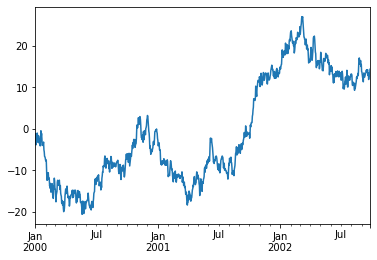

In [85]:
%matplotlib inline
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts.cumsum().plot()

<Figure size 432x288 with 0 Axes>

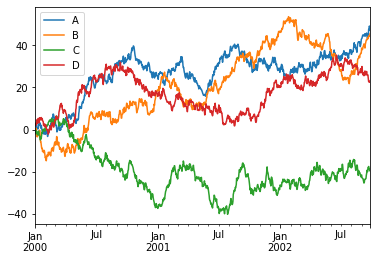

In [88]:
import matplotlib.pyplot as plt

pdf=pd.DataFrame(np.random.randn(1000, 4), index=ts.index,columns=['A', 'B', 'C', 'D'])
pdf = pdf.cumsum()
plt.figure(); pdf.plot(); plt.legend(loc='best')